## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
train = pd.read_csv("assets/train.csv")
test = pd.read_csv("assets/test.csv")

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

The training dataset has 891 rows (observations) and 12 columns (features) while the test dataset has just under half the number of rows and 11 columns.

In [4]:
train.columns.values, test.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

In [5]:
set(train.columns.values) - set(test.columns.values)

{'Survived'}

The training and test datasets have the same columns except that the test dataset is missing the target column (as expected).

**Data Dictionary:**

* PassengerId - unique ID, not relevant
* Survived - target, what we are trying to predict
* Pclass - ticket class, (1-3 for 1st/2nd/3rd)
* Name - text field for passenger name, including title
* Sex - passenger gender (male or female)
* SibSp - # of siblings or spouses onboard
* Parch - # of parents or children onboard
* Ticket - ticket number
* Fare - cost of ticket
* Cabin - cabin number
* Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will have to deal with missing values for Age, Cabin and Embarked.

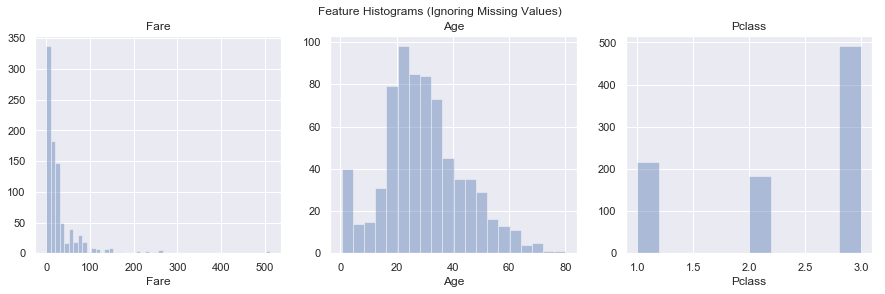

In [9]:
fig, axs = plt.subplots(1,3, figsize=(15,4))

for i, f in enumerate(["Fare", "Age", "Pclass"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()

The histograms above show that the majority of fares were less than 100 dollars. The majority of passengers were in the 20 to 40 age range and approximately the same number of passengers were in 3rd class as there were in 1st and 2nd class combined.

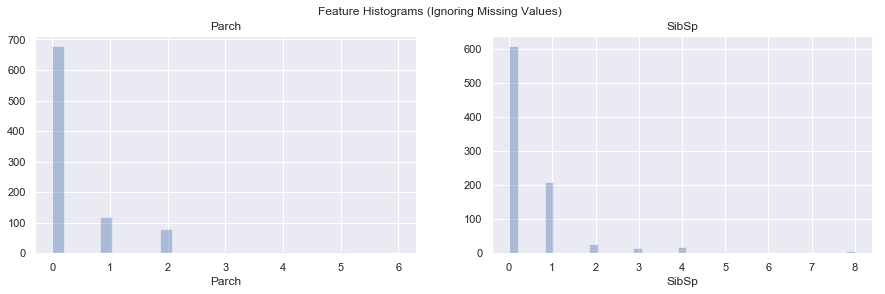

In [10]:
fig, axs = plt.subplots(1,2, figsize=(15,4))

for i, f in enumerate(["Parch", "SibSp"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()

Likewise, we see that most passengers traveled without parents, children, siblings or spouses.

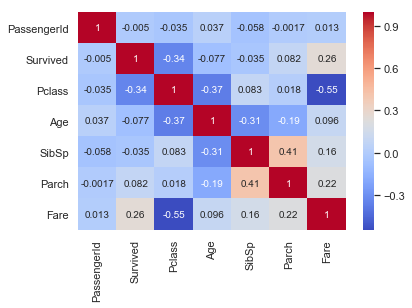

In [11]:
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.show()

From the correlation matrix, we see that *Pclass* has the highest negative correlation with *Survived*, followed by *Parch*; *Fare* is positively correlated.

In [12]:
train.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

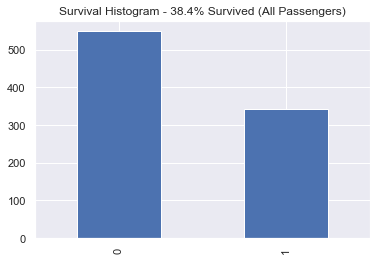

In [13]:
train_survived = train["Survived"].value_counts()
train_s_rate = train_survived[1] / train_survived.sum()

train_survived.plot(kind="bar")
plt.title("Survival Histogram - {:0.1%} Survived (All Passengers)".format(train_s_rate))

plt.show()

Out of all passengers, 38% survived.

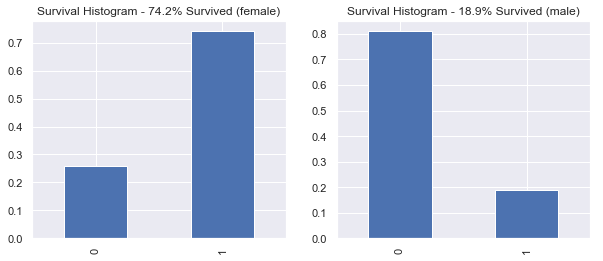

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
for i, sex in enumerate(["female", "male"]):
    temp = train[train["Sex"] == sex]["Survived"].value_counts()
    p_surv_given_sex = (temp / temp.sum()).sort_index()
    p_surv_given_sex.plot(kind="bar", ax=axs[i])
    axs[i].set_title("Survival Histogram - {:0.1%} Survived ({})".format(p_surv_given_sex[1], sex))

Sex was an important feature in deciding who survived. The graphs above correspond to the conditional probability of survival given a person's sex: $P(\text{survived } | \text{ male/female})$.

In [15]:
n_male = len(train[train["Sex"] == "male"])
n_female = len(train[train["Sex"] == "female"])
"Males: {:.1%}, Females: {:.1%}".format(n_male / len(train), n_female / len(train))

'Males: 64.8%, Females: 35.2%'

There were more males than females onboard.

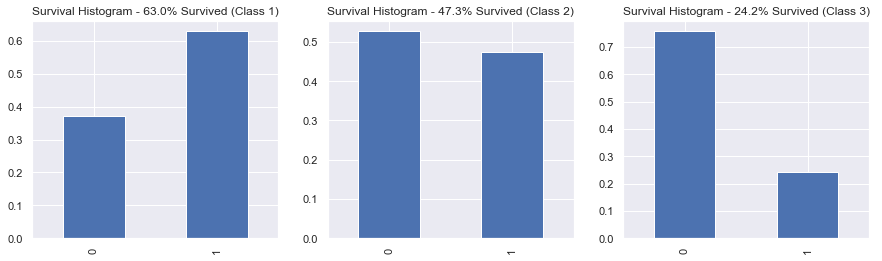

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
pclass_survival = []
for i, pclass in enumerate([1, 2, 3]):
    temp = train[train["Pclass"] == pclass]["Survived"].value_counts()
    p_surv_given_pclass = (temp / temp.sum()).sort_index()
    pclass_survival.append(p_surv_given_pclass[1])
    p_surv_given_pclass.plot(kind="bar", ax=axs[i])
    axs[i].set_title("Survival Histogram - {:0.1%} Survived (Class {})".format(p_surv_given_pclass[1], pclass))

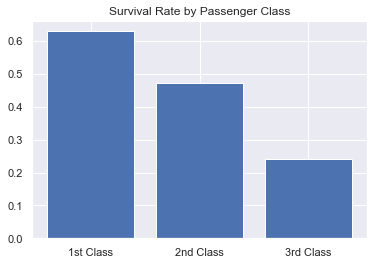

In [25]:
plt.bar([1, 2, 3], pclass_survival)
plt.xticks([1, 2, 3], ["1st Class", "2nd Class", "3rd Class"])
plt.title("Survival Rate by Passenger Class")
plt.show()

The distribution of survival conditioned on passenger class is also telling: 63% of first class passengers survived while only 24% of third class passengers survived.

In [27]:
for i in [13, 14, 15, 16, 17, 18, 19, 20, 21]:
    print(i, len(train[train["Age"] < i]))

13 69
14 71
15 78
16 83
17 100
18 113
19 139
20 164
21 180


Underage children make up a significant percentage of the people onboard. For example, there are 100 kids under the age of 18.

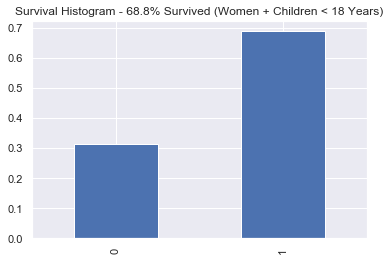

In [50]:
women_children_df = pd.concat([train[train["Sex"] == "female"], train[train["Age"] < 18]], ignore_index=True).drop_duplicates()

temp = women_children_df["Survived"].value_counts().sort_index()
temp = temp / temp.sum()

temp.plot(kind="bar")
plt.title("Survival Histogram - {:0.1%} Survived (Women + Children < 18 Years)".format(temp[1]))
plt.show()

Women and children under 18 had the highest chance of survival.